<a href="https://colab.research.google.com/github/Esanchezponce/01_MIAR_OCT_24/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos_(V2)_Erick_Sanchez_Ponce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Erick Hernan Sanchez Ponce  <br>
Url: https://github.com/Esanchezponce/01_MIAR_OCT_24/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos_(V2)_Erick_Sanchez_Ponce.ipynb<br>
Google Colab: https://colab.research.google.com/drive/1rpg3-zvnQu4BkTGPviahCoz5yml85_rc?usp=sharing <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de una jornada de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema:(copiar enunciado)

#Organizar sesiones de Doblaje

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:
Número de actores: 10
Número de tomas : 30
Actores/Tomas : https://bit.ly/36D8IuK
- 1 indica que el actor participa en la toma
- 0 en caso contrario

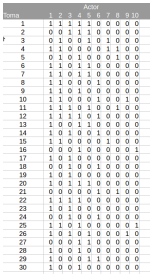







                                        

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

##¿Como represento el espacio de soluciones?##

In [12]:
# El espacio de soluciones se representa como un conjunto de asignaciones de "tomas" a diferentes "días" (Diccionario que asigna tomas a días.).
# Cada posible distribución de las tomas entre los días puede ser considerada como una solución dentro del espacio de soluciones
# En este caso, el espacio de soluciones esta representado en nuestro programa por:
# Funcion: busqueda_Tabu "generación de soluciones vecinas"
# Funcion: generar_solucion_inicial "solución inicial"

# Generación de Solución Inicial
def generar_solucion_inicial(num_tomas, max_tomas_por_dia):
    tomas = list(range(1, num_tomas + 1))
    random.shuffle(tomas)
    solucion = defaultdict(list)
    dia = 1
    for toma in tomas:
        solucion[dia].append(toma)
        if len(solucion[dia]) >= max_tomas_por_dia and toma != tomas[-1]:
            dia += 1
    return dict(solucion)

# Generación de Soluciones Vecinas
def generar_vecinos(solucion_actual, tomas_pendientes_inicial):
    vecinos = []
    for dia_origen, tomas_origen in solucion_actual.items():
        for i, toma_a_mover in enumerate(tomas_origen):
            for dia_destino, tomas_destino in solucion_actual.items():
                if dia_origen != dia_destino and len(tomas_destino) < max_tomas_por_dia:
                    nueva_solucion = solucion_actual.copy()
                    nueva_solucion[dia_origen] = tomas_origen[:i] + tomas_origen[i+1:]
                    if not nueva_solucion[dia_origen]:
                        del nueva_solucion[dia_origen]
                    nueva_solucion[dia_destino] = tomas_destino + [toma_a_mover]
                    vecinos.append(nueva_solucion)

            tomas_asignadas = set()
            for tomas in solucion_actual.values():
                tomas_asignadas.update(tomas)
            if len(tomas_asignadas) < len(tomas_pendientes_inicial):
                nuevo_dia = max(solucion_actual.keys()) + 1 if solucion_actual else 1
                nueva_solucion = solucion_actual.copy()
                nueva_solucion[dia_origen] = tomas_origen[:i] + tomas_origen[i+1:]
                if not nueva_solucion[dia_origen]:
                    del nueva_solucion[dia_origen]
                nueva_solucion[nuevo_dia] = [toma_a_mover]
                vecinos.append(nueva_solucion)
    return vecinos

##¿Cual es la función objetivo?##

In [11]:
# La función objetivo es la evaluación del costo total (número de actores) de la solución.
# En nuestro caso se busca asignar las tomas a los días de grabación de manera eficiente, con el menor número de actores necesarios para completar todas las tomas en un día.
# En nuestro caso la Función objetivo se evalua con:
# Función: evaluar_solucion (Esta funcion evalua el número de actores unicos por día de grabacion "calcular_costo_dia" considerando el maximo de tomas por día "max_tomas_por_dia")

# Funcion Objetivo (evaluación):
def evaluar_solucion(solucion, df):
    costo_total = 0
    for dia, tomas_en_dia in solucion.items():
        if len(tomas_en_dia) > max_tomas_por_dia:
            return float('inf')  # Penalización por exceder el límite de tomas
        costo_total += calcular_costo_dia(tomas_en_dia, df)
    return costo_total


##¿Como implemento las restricciones?##

In [14]:
# Se implementa considerando lo siguiente: número máximo de tomas por día, actores únicos por día, y que todas las tomas sean asignadas a un día.

# La Restricción de numero maximo por día se identifica dentro de la función "evaluar_solucion"
# La restricción de actores unicos por día se evalua dentro de la función "calcular-costo_dia"
# La restricción de las tomas a un día se evalúa dentro de la función "generar_vecinos"

#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

In [26]:
#Respuesta
# Complegidad del Problema: El problema es NP-difícil

# Orden de Complejidad: Debido a que la función "busqueda_tabu" es la que registra mayor complejidad, diriamos que todo el problema presenta una complejidad "O(num_iteraciones * n^3 * m)"
#   num_iteraciones: es el número de iteraciones que se realiza en la búsqueda tabú.
#   n: es el número de tomas (o días en el peor caso).
#   m: es el número de actores.

# Contabilizar el espacio de Soluciones: Debido a la complejidad del problema resulta dificil contabilizar el espacio de soluciones.

#Diseño
- ¿Que técnica utilizo? ¿Por qué?

In [27]:
#Respuesta:
# ¿Que tecnica utilizó?: Se utilizó la tecnica de Algoritmos de Busqueda TABU.

# ¿Porque?: Se utilizó la técnica de búsqueda tabú porque es efectiva para explorar grandes espacios de soluciones complejos, evitando quedar atrapado en óptimos locales y permitiendo encontrar buenas soluciones para los problemas de optimización combinatoria donde encontrar la solución óptima de forma exacta es computacionalmente costosa.

#Desarrollo

In [25]:
import random
import pandas as pd
from collections import defaultdict

# Datos de la tabla como diccionario
datos = {
    "Toma": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "1": [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1],
    "2": [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    "3": [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    "4": [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
    "5": [1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
    "6": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    "7": [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "8": [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "9": [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    "10": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Total": [5, 3, 3, 4, 3, 4, 4, 3, 3, 4, 5, 5, 3, 3, 3, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 3, 2]
}

# Crear el DataFrame
df_actores = pd.DataFrame(datos)
df_actores = df_actores.set_index('Toma')

num_tomas = len(df_actores)
num_actores = len(df_actores.columns)
max_tomas_por_dia = 6

"""Calcula el costo (número de actores únicos) para un día de grabación."""
def calcular_costo_dia(tomas_dia, df):
    actores_requeridos = [0] * num_actores
    for toma_index in tomas_dia:
        for i, col in enumerate(df.columns):
            if df.loc[toma_index, col] == 1:
                actores_requeridos[i] = 1
    return sum(actores_requeridos)

"""Evalúa una solución (diccionario de día: [lista de tomas]) y devuelve su costo."""
def evaluar_solucion(solucion, df):
    costo_total = 0
    for dia, tomas_en_dia in solucion.items():
        if len(tomas_en_dia) > max_tomas_por_dia:
            return float('inf')  # Penalización por exceder el límite de tomas
        costo_total += calcular_costo_dia(tomas_en_dia, df)
    return costo_total

"""Genera soluciones vecinas moviendo una toma a otro día."""
def generar_vecinos(solucion_actual, tomas_pendientes_inicial):
    vecinos = []
    for dia_origen, tomas_origen in solucion_actual.items():
        for i, toma_a_mover in enumerate(tomas_origen):
            # Intentar mover la toma a un día existente
            for dia_destino, tomas_destino in solucion_actual.items():
                if dia_origen != dia_destino and len(tomas_destino) < max_tomas_por_dia:
                    nueva_solucion = solucion_actual.copy()  # Copiar el diccionario
                    nueva_solucion[dia_origen] = tomas_origen[:i] + tomas_origen[i+1:]
                    if not nueva_solucion[dia_origen]:
                        del nueva_solucion[dia_origen]
                    nueva_solucion[dia_destino] = tomas_destino + [toma_a_mover]
                    vecinos.append(nueva_solucion)

            # Intentar mover la toma a un nuevo día (si no todas las tomas están asignadas)
            tomas_asignadas = set()
            for tomas in solucion_actual.values():
                tomas_asignadas.update(tomas)
            if len(tomas_asignadas) < len(tomas_pendientes_inicial):
                nuevo_dia = max(solucion_actual.keys()) + 1 if solucion_actual else 1
                nueva_solucion = solucion_actual.copy()  # Copiar el diccionario
                nueva_solucion[dia_origen] = tomas_origen[:i] + tomas_origen[i+1:]
                if not nueva_solucion[dia_origen]:
                    del nueva_solucion[dia_origen]
                nueva_solucion[nuevo_dia] = [toma_a_mover]
                vecinos.append(nueva_solucion)
    return vecinos

"""Genera una solución inicial aleatoria."""
def generar_solucion_inicial(num_tomas, max_tomas_por_dia):
    tomas = list(range(1, num_tomas + 1))
    random.shuffle(tomas)
    solucion = defaultdict(list)
    dia = 1
    for toma in tomas:
        solucion[dia].append(toma)
        if len(solucion[dia]) >= max_tomas_por_dia and toma != tomas[-1]:
            dia += 1
    return dict(solucion)

"""Implementación del algoritmo de búsqueda tabú."""
def busqueda_tabu(df, num_iteraciones, tamano_tabu):
    solucion_actual = generar_solucion_inicial(num_tomas, max_tomas_por_dia)
    mejor_solucion = solucion_actual.copy()
    mejor_costo = evaluar_solucion(mejor_solucion, df)

    # Crear la lista de soluciones tabú
    lista_tabu = [tuple([dia, sorted(tomas)]) for dia, tomas in mejor_solucion.items()]

    tomas_pendientes_inicial = set(range(1, num_tomas + 1))

    for iteracion in range(num_iteraciones):
        vecinos = generar_vecinos(solucion_actual, tomas_pendientes_inicial)
        mejor_vecino = None
        mejor_costo_vecino = float('inf')

        for vecino in vecinos:
            costo_vecino = evaluar_solucion(vecino, df)
            # Crear la tupla de la solución vecina de manera adecuada
            vecino_tupla = tuple([dia, sorted(tomas)] for dia, tomas in vecino.items())

            if costo_vecino < mejor_costo_vecino and vecino_tupla not in lista_tabu:
                mejor_costo_vecino = costo_vecino
                mejor_vecino = vecino
            elif costo_vecino < mejor_costo and vecino_tupla in lista_tabu:
                # Criterio de aspiración: permitir un movimiento tabú si mejora la mejor solución encontrada
                mejor_costo_vecino = costo_vecino
                mejor_vecino = vecino

        if mejor_vecino:
            solucion_actual = mejor_vecino
            costo_actual = mejor_costo_vecino
            vecino_tupla = tuple([dia, sorted(tomas)] for dia, tomas in solucion_actual.items())
            lista_tabu.append(vecino_tupla)
            if len(lista_tabu) > tamano_tabu:
                lista_tabu.pop(0)

            if costo_actual < mejor_costo:
                mejor_costo = costo_actual
                mejor_solucion = solucion_actual.copy()

        print(f"Iteración {iteracion + 1}: Mejor costo actual = {mejor_costo}")

    return mejor_solucion, mejor_costo


# --- Ejecución de la búsqueda tabú ---
num_iteraciones = 500
tamano_tabu = 50

mejor_plan, mejor_costo = busqueda_tabu(df_actores, num_iteraciones, tamano_tabu)

print("\nMejor solución encontrada por Búsqueda Tabú:")
for dia, tomas in sorted(mejor_plan.items()):
    actores_dia = calcular_costo_dia(tomas, df_actores)
    print(f"Día {dia}: Tomas {tomas}, Actores requeridos: {actores_dia}")

print(f"\nCosto Total de Actores: {mejor_costo}")

Iteración 1: Mejor costo actual = 37
Iteración 2: Mejor costo actual = 37
Iteración 3: Mejor costo actual = 37
Iteración 4: Mejor costo actual = 37
Iteración 5: Mejor costo actual = 37
Iteración 6: Mejor costo actual = 37
Iteración 7: Mejor costo actual = 37
Iteración 8: Mejor costo actual = 37
Iteración 9: Mejor costo actual = 37
Iteración 10: Mejor costo actual = 37
Iteración 11: Mejor costo actual = 37
Iteración 12: Mejor costo actual = 37
Iteración 13: Mejor costo actual = 37
Iteración 14: Mejor costo actual = 37
Iteración 15: Mejor costo actual = 37
Iteración 16: Mejor costo actual = 37
Iteración 17: Mejor costo actual = 37
Iteración 18: Mejor costo actual = 37
Iteración 19: Mejor costo actual = 37
Iteración 20: Mejor costo actual = 37
Iteración 21: Mejor costo actual = 37
Iteración 22: Mejor costo actual = 37
Iteración 23: Mejor costo actual = 37
Iteración 24: Mejor costo actual = 37
Iteración 25: Mejor costo actual = 37
Iteración 26: Mejor costo actual = 37
Iteración 27: Mejor c